In [15]:
import hashlib
import os
import math as m
from random import SystemRandom
import numpy as np
import matplotlib.pyplot as plt


In [16]:
def generate_seed(raw_key_length,error_rate):
    #Generates a seed accordingly to the error rate and the raw key length
    seed_length = int(m.log2(raw_key_length/error_rate))
    seed = os.urandom(seed_length)
    return seed

def privacy_amplification(raw_key, error_rate,seed):
    #Performs privacy amplification on a raw key generated by QKD using a (k,e)-strong randomness extractor.
    #Input: raw_key: The raw key to be amplified
    #error_rate: the error rate of the raw key
    
    #Output: The amplified key
    
    # Hash the seed using SHA-256
    hashed_seed = hashlib.sha256(seed).digest()
    
    # Use a (k,e)-strong randomness extractor to extract k bits of randomness from the raw key
    k = int(len(raw_key)*(1-error_rate)) #Keeping it simple
    extractor = hashlib.shake_256()
    extractor.update(hashed_seed)
    extractor.update(bytes(raw_key))
    amplified_key = extractor.digest(k)
    
    return list(amplified_key)


def wholeBB84PrivacyAmplification(RawAliceKey,RawBobKey,error_rate):
    #Returns new keys after the privacy amplification procedure
    #Input: Raw Alicew and Bob keys, with the error_rate
    #Output: The new shorter and cooler amplified keys
    
    seed = generate_seed(len(RawAliceKey),error_rate)
    newAliceKey = privacy_amplification(RawAliceKey,error_rate,seed)
    newBobKey = privacy_amplification(RawBobKey,error_rate,seed)
    
    return newAliceKey,newBobKey

def wholeBB84PrivacyAmplification_withEve(RawAliceKey,RawBobKey,RawEveKey,error_rate):
    #Returns new keys after the privacy amplification procedure
    #Input: Raw Alice and Bob keys, with the error_rate
    # Raw Eve key, possibly with another error rate
    #Output: The new shorter and cooler amplified keys
    
    seed = generate_seed(len(RawAliceKey),error_rate)
    newAliceKey = privacy_amplification(RawAliceKey,error_rate,seed)
    newBobKey = privacy_amplification(RawBobKey,error_rate,seed)
    newEveKey = privacy_amplification(RawEveKey,error_rate,seed)
    
    return newAliceKey,newBobKey,newEveKey
    

In [17]:
key1 = [1,0,1,0,0,0,1,1,0,0,1,0,1,0,1]
key2 = [1,0,1,0,0,0,1,1,0,0,1,0,1,0,1]
error_rate = 1E-8

#Each of the funcitons separatedly
seed = generate_seed(len(key1),error_rate)

newkey1 = privacy_amplification(key1,error_rate,seed)
newkey2 = privacy_amplification(key2,error_rate,seed)

print("Before Privacy Amplification:")
print("Raw Alice Key: ")
print(key1)
print("Raw Bob Key: ")
print(key2)
print("Old length: ",len(key1))

print()
print("After Privacy Amplification (by parts):")
print("New Alice Key: ")
print(newkey1)
print("New Bob Key: ")
print(newkey2)
print("New length: ",len(newkey1))

#Applying whole... function:

newAliceKey,newBobKey = wholeBB84PrivacyAmplification(key1,key2,error_rate)

print()
print("After Privacy Amplification (whole... function, different seed):")
print("New Alice Key: ")
print(newAliceKey)
print("New Bob Key: ")
print(newBobKey)
print("New length: ",len(newAliceKey))
print()






Before Privacy Amplification:
Raw Alice Key: 
[1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1]
Raw Bob Key: 
[1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1]
Old length:  15

After Privacy Amplification (by parts):
New Alice Key: 
[46, 74, 32, 63, 86, 254, 130, 70, 133, 151, 234, 229, 31, 88]
New Bob Key: 
[46, 74, 32, 63, 86, 254, 130, 70, 133, 151, 234, 229, 31, 88]
New length:  14

After Privacy Amplification (whole... function, different seed):
New Alice Key: 
[29, 233, 133, 201, 34, 228, 56, 85, 220, 1, 70, 173, 109, 5]
New Bob Key: 
[29, 233, 133, 201, 34, 228, 56, 85, 220, 1, 70, 173, 109, 5]
New length:  14



In [18]:
#Let's find out how it works!
def distanceKey(Key1,Key2):
    #Calculates the distance between keys, defined as the sum of the abs(differences)
    dist = 0
    for i in range(len(Key1)):
        if Key1[i]!=Key2[i]:
            dist += 1
    return dist/len(Key1)

def CopyWithError(KeyToCopy,error_rate):
    #Input: Key to Copy, error rate in the copying process (0s and 1s)
    #Output: New copied key
    newKey = []
    for element in KeyToCopy:
        randnr = np.random.rand()
        if randnr < error_rate:
            newKey.append((element + 1)%2)
        else:
            newKey.append(element)
    return newKey


In [19]:
N = int(1E6)
error_rate = 1E-8
error_factor_eve = 1E3

key_original = list(np.random.randint(2,size=N))
key_copy = CopyWithError(key_original,error_rate)
key_eve = CopyWithError(key_original,error_rate*error_factor_eve)

#print(key_original)
#print(key_copy)

print("Distance Alice-Bob before Privacy Amplification: ", distanceKey(key_original,key_copy))
print("Distance Alice-Eve before Privacy Amplification: ", distanceKey(key_original,key_eve))
print()

new_key_original, new_key_copy, new_key_Eve = wholeBB84PrivacyAmplification_withEve(key_original,key_copy,key_eve, error_rate)

print("Distance Alice-Bob after Privacy Amplification: ", distanceKey(new_key_original,new_key_copy))
print("Distance Alice-Eve after Privacy Amplification: ", distanceKey(new_key_original,new_key_Eve))

Distance Alice-Bob before Privacy Amplification:  0.0
Distance Alice-Eve before Privacy Amplification:  1.5e-05

Distance Alice-Bob after Privacy Amplification:  0.0
Distance Alice-Eve after Privacy Amplification:  0.9961289961289961


0 / 14
1 / 14
2 / 14
3 / 14
4 / 14
5 / 14
6 / 14
7 / 14
8 / 14
9 / 14
10 / 14
11 / 14
12 / 14
13 / 14
14 / 14


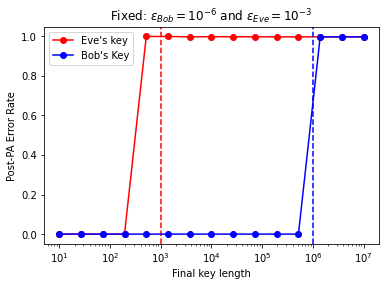

In [48]:
N_min = 1E1
N_max = 1E7
N_steps = 15
N_array = np.geomspace(N_min,N_max,N_steps)

error_rate = 1/N_max*1E1
error_factor_eve = 1E3

distance_AB_array = np.zeros(N_steps)
distance_Eve_array = np.zeros(N_steps)

for i in range(N_steps):
    print(i,"/",N_steps-1)
    N = int(N_array[i])
    key_original = list(np.random.randint(2,size=N))
    key_copy = CopyWithError(key_original,error_rate)
    key_eve = CopyWithError(key_original,error_rate*error_factor_eve)

    new_key_original, new_key_copy, new_key_Eve = wholeBB84PrivacyAmplification_withEve(key_original,key_copy,key_eve, error_rate)
    distance_AB_array[i] = distanceKey(new_key_original,new_key_copy)
    distance_Eve_array[i]= distanceKey(new_key_original,new_key_Eve)

plt.plot(N_array,distance_Eve_array,"ro-",label="Eve's key")
plt.axvline(1/(error_rate*error_factor_eve), color="r",linestyle="--")
plt.plot(N_array,distance_AB_array,"bo-",label="Bob's Key")
plt.axvline(1/error_rate,color="b",linestyle="--")

plt.xlabel("Final key length")
plt.ylabel("Post-PA Error Rate")
plt.xscale("log")
plt.title("Fixed: " + r'$\epsilon_{Bob} = 10^{-6}$' + " and " + r'$\epsilon_{Eve} = 10^{-3}$')
plt.legend()
plt.show()